In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from DecisionTree import DecisionTree

# Data location

In [4]:
data_path = "data/clean_data.csv"

# Load data

In [5]:
df = pd.read_csv(data_path)

In [6]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448.0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,2448.0,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.794,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,6238.0,2.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,6238.0,2.0,260.0,52.0,105.0,70.0,0.0,0.0,29.430,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,6238.0,2.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212.0,1.0,173.0,46.0,126.0,82.0,0.0,0.0,19.170,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11623,9998212.0,1.0,153.0,52.0,143.0,89.0,0.0,0.0,25.740,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11624,9999312.0,2.0,196.0,39.0,133.0,86.0,1.0,30.0,20.910,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0
11625,9999312.0,2.0,240.0,46.0,138.0,79.0,1.0,20.0,26.390,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0


In [7]:
df.shape

(11627, 39)

In [8]:
df['HDLC']

0        45.0
1        31.0
2        45.0
3        45.0
4        54.0
         ... 
11622    52.0
11623    30.0
11624    52.0
11625    52.0
11626    52.0
Name: HDLC, Length: 11627, dtype: float64

In [9]:
(df.columns)

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [10]:
df.iloc[:, 1: 23].columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
       'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
       'LDLC'],
      dtype='object')

In [11]:
df.iloc[:, 23: 31].columns

Index(['DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD',
       'HYPERTEN'],
      dtype='object')

In [12]:
print(df.iloc[:, 1: 23].shape[1], df.iloc[:, 23: 31].shape[1])

22 8


# Split data set into train, validation and test

In [13]:
data = np.loadtxt(data_path, delimiter=",",dtype=float, skiprows=1)
col_names = np.genfromtxt(data_path , delimiter=',', names=True, dtype=float).dtype.names[1:31]
x_col_names = col_names[0:22]
y_col_names = col_names[22:30]

X = data[:, 1:23]
Y = data[:, 29:30]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y.shape)
print(X_train.shape)

(11627, 1)
(6976, 22)


In [14]:
len(x_col_names)

22

# Depth

In [15]:
DEPTH=5

# Train and test

             DEATH              

 Decision tree fit and display  
|--- AGE <= 55.0 
|---|--- SEX = 2.0 
|---|---|--- SYSBP <= 136.0 
|---|---|---|--- CIGPDAY <= 13.0 else  0.0
|---|---|---|---|--- TIME <= 1946.0 value 0.0
|---|---|---|---|---|--- GLUCOSE <= 129.0 value 0.0 else 1.0
|---|---|---|--- TIME <= 2233.0 
|---|---|---|---|--- GLUCOSE <= 125.0 
|---|---|---|---|---|--- PREVSTRK = 1.0 value 1.0 else 0.0
|---|---|---|---|---|--- PREVHYP = 1.0 value 1.0 else 0.0
|---|---|---|---|--- HEARTRTE <= 97.0 
|---|---|---|---|---|--- GLUCOSE <= 207.0 value 0.0 else 1.0
|---|---|---|---|---|--- TIME <= 4397.0 value 0.0 else 1.0
|---|---|--- TIME <= 2165.0 
|---|---|---|--- AGE <= 43.0 value 0.0
|---|---|---|---|--- SYSBP <= 132.0 value 0.0
|---|---|---|---|---|--- PREVCHD = 1.0 value 1.0 else 0.0
|---|---|---|--- HEARTRTE <= 92.0 
|---|---|---|---|--- PREVCHD = 1.0 else  0.0
|---|---|---|---|---|--- TIME <= 4393.0 value 0.0 else 1.0
|---|---|---|---|--- TOTCHOL <= 221.0 else  0.0
|---|---|

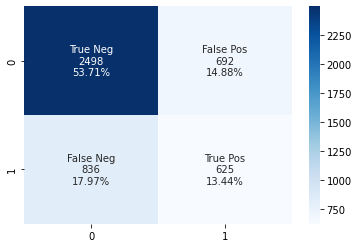

sensitivity : 0.4277891854893908, specificity : 0.7830721003134796, PPV : 0.4745634016704632, NPV : 0.749250149970006




             ANGINA             

 Decision tree fit and display  


In [ ]:
total_accuracy = 0
decision_trees = []
for i, column in enumerate(y_col_names):
    print("\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    i = i + 23
    Y = data[:, i:(i+1)]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
   
    print("\x1b[6;30;43m", "Decision tree fit and display".center(30), "\x1b[0m")
    decision_tree = DecisionTree(max_depth=DEPTH)
    decision_tree.fit(X_train, Y_train, x_col_names=x_col_names)
    decision_tree.pretty_print()
    decision_trees.append(decision_tree)
    
    print("\n\x1b[6;30;43m", "Test".center(30),"\x1b[0m")
    
    total_accuracy += decision_tree.prediction_analyse(X_test, Y_test)
    print("\n\n\n")
print("\x1b[6;30;42m", "Mean accuracy of all labels :".center(30), "\x1b[0m", total_accuracy / len(y_col_names))

# Evaluation on one human

In [ ]:
for i, column in enumerate(y_col_names):
    print("\n\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    decision_trees[i].predict_one_element(X_test[0], display_evaluation_flow=False) 